In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

C:\Users\Kirtibala.Gujar\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
pip install sklearn


In [16]:

import pandas as pd

from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import NearestNeighbors

from openpyxl.styles import PatternFill  # Import PatternFill class from openpyxl.styles

# Load the data

df = pd.read_excel('Life_Insurance_data.xlsx')  # Replace 'your_data.xlsx' with your actual file path

# Initialize global variables

var1 = "No Error"

# Feature engineering

df['Location'] = df['State']  # Assuming 'Location' is derived from 'State' (adjust if needed)

# Calculate Z-scores for 'Income' and 'Assets' columns

df['Z_Score_Income'] = (df['Income'] - df['Income'].mean()) / df['Income'].std()

df['Z_Score_Assets'] = (df['Assets'] - df['Assets'].mean()) / df['Assets'].std()

# Define conditions for mismatched applicants

mismatch_condition = (

    (((df['Z_Score_Income'] > 2) | (df['Z_Score_Assets'] > 2)) & (df['Age'] < 21)) |  # Z-score for Income or Assets greater than 2 and Age less than 21

    ((df['Profession'].isin(['driver', 'technician', 'operator'])) & ((df['Z_Score_Income'] > 2) | (df['Z_Score_Assets'] > 2))) |  # Profession is 'driver', 'technician', 'operator' and Z-score for Income greater than 2 or Z-score for Assets greater than 2

    ((df['Age'] < 21) & (df['State'] == 'MH'))  # Age is less than 21 and Location is Rural

)

# Create a new column 'Mismatched_Applicant' to flag mismatched applicants

df['Mismatched_Applicant'] = False

df.loc[mismatch_condition, 'Mismatched_Applicant'] = True

# Feature scaling

scaler = StandardScaler()

df[['Income', 'Assets', 'Age']] = scaler.fit_transform(df[['Income', 'Assets', 'Age']])

# Isolation Forest for outlier detection

isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset

df['isolation_forest_score'] = isolation_forest.fit_predict(df[['Income', 'Assets', 'Age']])

# KNN for further refinement

knn = NearestNeighbors(n_neighbors=10)  # You can adjust the number of neighbors

knn.fit(df[['Income', 'Assets', 'Age']])

distances, indices = knn.kneighbors(df[['Income', 'Assets', 'Age']])

mean_distance = distances.mean(axis=1)

df['knn_distance'] = mean_distance

# Flag doubtful applicants based on both Isolation Forest and KNN

df['is_outlier'] = (df['isolation_forest_score'] == -1) & (df['knn_distance'] > df['knn_distance'].quantile(0.95))

# Highlight mismatched applicants in Excel

output_excel_file_path = 'Mismatched_Applicants_zscore.xlsx'

with pd.ExcelWriter(output_excel_file_path, engine='openpyxl') as writer:

    df.to_excel(writer, index=False, sheet_name='Mismatched_Applicants')

    output_sheet = writer.sheets['Mismatched_Applicants']

    fill = PatternFill(start_color="FF0000", end_color="FF0000", fill_type="solid")

    # Get the column index for 'Mismatched_Applicant'

    mismatch_column_index = df.columns.get_loc('Mismatched_Applicant') + 1

    for row in output_sheet.iter_rows(min_row=2, max_row=output_sheet.max_row, min_col=mismatch_column_index, max_col=mismatch_column_index):

        for cell in row:

            if cell.value or (cell.column_letter == 'C' and df.at[cell.row-1, 'Age'] < 21):  # Assuming 'Age' column is in column 'C' (adjust if needed)

                cell.fill = fill

print(f"Mismatched applicants flagged and saved to {output_excel_file_path}")

Mismatched applicants flagged and saved to Mismatched_Applicants_zscore.xlsx


In [2]:
pip install --upgrade bottleneck


     ---------------------------------------- 0.0/109.9 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.9 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.9 kB ? eta -:--:--
     ---------- -------------------------- 30.7/109.9 kB 217.9 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/109.9 kB 217.9 kB/s eta 0:00:01
     --------------------------- --------- 81.9/109.9 kB 353.1 kB/s eta 0:00:01
     ------------------------------------ 109.9/109.9 kB 398.6 kB/s eta 0:00:00
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.5
    Uninstalling Bottleneck-1.3.5:
      Successfully uninstalled Bottleneck-1.3.5
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from openpyxl.styles import PatternFill  # Import PatternFill class from openpyxl.styles

# Load the data
df = pd.read_excel('Life_Insurance_data.xlsx')  # Replace 'your_data.xlsx' with your actual file path

# Initialize global variables
var1 = "No Error"

# Feature engineering
df['Location'] = df['State']  # Assuming 'Location' is derived from 'State' (adjust if needed)

# Define conditions for mismatched applicants
mismatch_condition = (
    (((df['Income'] > 4000000) | (df['Assets'] > 10000000)) & (df['Age'] <= 21)) |  # Income or assets greater than 4 crore and age less than or equal to 21
    ((df['Profession'].isin(['driver', 'technician', 'operator'])) & ((df['Income'] > 2000000) | (df['Assets'] > 10000000))) |  # Profession is 'driver', 'technician', 'operator' and income greater than 4 crore
    ((df['Age'] < 21) & (df['State'] == 'MH'))  # Location is Rural
)

# Create a new column 'Mismatched_Applicant' to flag mismatched applicants
df['Mismatched_Applicant'] = False
df.loc[mismatch_condition, 'Mismatched_Applicant'] = True

# Feature scaling
scaler = StandardScaler()
df[['Income', 'Assets', 'Age']] = scaler.fit_transform(df[['Income', 'Assets', 'Age']])

# Isolation Forest for outlier detection
isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset
df['isolation_forest_score'] = isolation_forest.fit_predict(df[['Income', 'Assets', 'Age']])

# KNN for further refinement
knn = NearestNeighbors(n_neighbors=10)  # You can adjust the number of neighbors
knn.fit(df[['Income', 'Assets', 'Age']])
distances, indices = knn.kneighbors(df[['Income', 'Assets', 'Age']])
mean_distance = distances.mean(axis=1)
df['knn_distance'] = mean_distance

# Flag doubtful applicants based on both Isolation Forest and KNN
df['is_outlier'] = (df['isolation_forest_score'] == -1) & (df['knn_distance'] > df['knn_distance'].quantile(0.95))

# Highlight mismatched applicants in Excel
output_excel_file_path = 'Mismatched_Applicants0000.xlsx'
with pd.ExcelWriter(output_excel_file_path, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Mismatched_Applicants')

    output_sheet = writer.sheets['Mismatched_Applicants']
    fill = PatternFill(start_color="FF0000", end_color="FF0000", fill_type="solid")

    # Get the column index for 'Mismatched_Applicant'
    mismatch_column_index = df.columns.get_loc('Mismatched_Applicant') + 1

    for row in output_sheet.iter_rows(min_row=2, max_row=output_sheet.max_row, min_col=mismatch_column_index, max_col=mismatch_column_index):
        for cell in row:
            if cell.value or (cell.column_letter == 'C' and df.at[cell.row-1, 'Age'] < 21):  # Assuming 'Age' column is in column 'C' (adjust if needed)
                cell.fill = fill

print(f"Mismatched applicants flagged and saved to {output_excel_file_path}")


Mismatched applicants flagged and saved to Mismatched_Applicants0000.xlsx


In [11]:
# Load the data
data = pd.read_excel('Life_Insurance_data.xlsx')  # Replace 'your_data.xlsx' with your actual file path

df = pd.DataFrame(data)
print (df)
# Display sample data
print(df.head())


# Select relevant features for analysis
features = ['Income', 'Assets']

# Initialize Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)  # Contamination parameter can be adjusted

# Fit model and predict outliers
df['IsOutlier'] = isolation_forest.fit_predict(df[features])

# Flag applications with outliers
df['Flagged'] = df['IsOutlier'].apply(lambda x: 'Yes' if x == -1 else 'No')

# Display flagged applications
print(df[df['Flagged'] == 'Yes'][['Application ID', 'Name', 'Income', 'Assets', 'Flagged']])

from sklearn.neighbors import NearestNeighbors

# Select features for KNN refinement
refinement_features = ['Income', 'Assets', 'Age']

# Initialize KNN model
knn = NearestNeighbors(n_neighbors=5)  # Adjust number of neighbors as needed

# Fit KNN model
knn.fit(df[refinement_features])

# Compute average distance to neighbors
distances, _ = knn.kneighbors(df[refinement_features])
df['MeanDistance'] = distances.mean(axis=1)

# Flag applications with unusually high distance to neighbors
threshold = df['MeanDistance'].quantile(0.95)
df['RefinedFlag'] = df['MeanDistance'].apply(lambda x: 'Yes' if x > threshold else 'No')

# Display refined flagged applications
print(df[df['RefinedFlag'] == 'Yes'][['Application ID', 'Name', 'Income', 'Assets', 'MeanDistance', 'RefinedFlag']])




    Application ID      Name  Gender  Age  Profession   Income    Assets  \
0                1     Arjun    Male   30      Doctor    60000   1200000   
1                2     Kavya  Female   45     manager    75000   1150000   
2                3     Rajat    Male   28     Teacher    50000    100000   
3                4     Sneha  Female   35      driver   500000   2100000   
4                5     Akash    Male   50  technician  4500000  20000000   
5                6     Anaya  Female   32    engineer    65000    130000   
6                7   Vignesh    Male   40     Teacher    55000    110000   
7                8  Niharika  Female   28      Lawyer    70000    160000   
8                9   Pradeep    Male   55      Doctor   100000    250000   
9               10     Anand    Male   38    Engineer    85000    190000   
10              11     Kirti  Female   31     Teacher    60000    120000   
11              12     Vivek    Male   20      driver   750000  27000000   
12          

In [26]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors

# Load the data
data = pd.read_excel('Life_Insurance_data.xlsx')  # Replace 'Life_Insurance_data.xlsx' with your actual file path

# Create DataFrame
df = pd.DataFrame(data)

# Select relevant features for analysis
features = ['Income', 'Assets']

# Initialize Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)  # Contamination parameter can be adjusted

# Fit model and predict outliers
df['IsOutlier'] = isolation_forest.fit_predict(df[features])

# Flag applications with outliers
df['Flagged'] = df['IsOutlier'].apply(lambda x: 'Yes' if x == -1 else 'No')

# Initialize KNN model for refinement
refinement_features = ['Income', 'Assets', 'Age']
knn = NearestNeighbors(n_neighbors=5)  # Adjust number of neighbors as needed

# Fit KNN model
knn.fit(df[refinement_features])

# Compute average distance to neighbors
distances, _ = knn.kneighbors(df[refinement_features])
df['MeanDistance'] = distances.mean(axis=1)

# Flag applications with unusually high distance to neighbors
threshold = df['MeanDistance'].quantile(0.95)
df['RefinedFlag'] = df['MeanDistance'].apply(lambda x: 'Yes' if x > threshold else 'No')

# Save DataFrame to Excel with refined flag
output_file = 'Life_Insurance_data_with_flags.xlsx'
df.to_excel(output_file, index=False)

print(f"Data with flags saved to {output_file}")


Data with flags saved to Life_Insurance_data_with_flags.xlsx


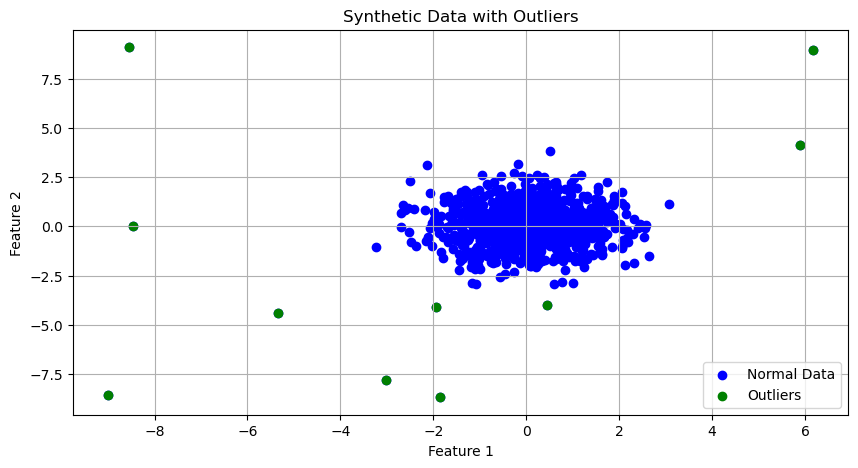

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors

# Generate synthetic data with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(1000, 2))
outliers = np.random.uniform(low=-10, high=10, size=(10, 2))
data = np.vstack([normal_data, outliers])

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], c='b', label='Normal Data')
plt.scatter(outliers[:, 0], outliers[:, 1], c='g', label='Outliers')
plt.title('Synthetic Data with Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


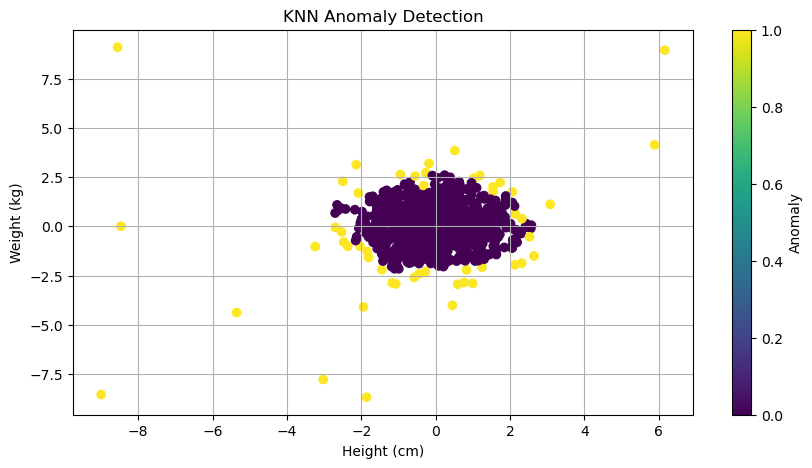

In [30]:
# KNN for anomaly detection
knn = NearestNeighbors(n_neighbors=5)
knn.fit(data)

# Compute distances to K nearest neighbors
distances, _ = knn.kneighbors(data)
mean_distances = np.mean(distances, axis=1)

# Set threshold for outlier detection
threshold = np.percentile(mean_distances, 95)

# Predict anomalies
knn_outliers = (mean_distances > threshold).astype(int)

# Plot KNN results
plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], c=knn_outliers, cmap='viridis')
plt.colorbar(label='Anomaly')
plt.title('KNN Anomaly Detection')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()


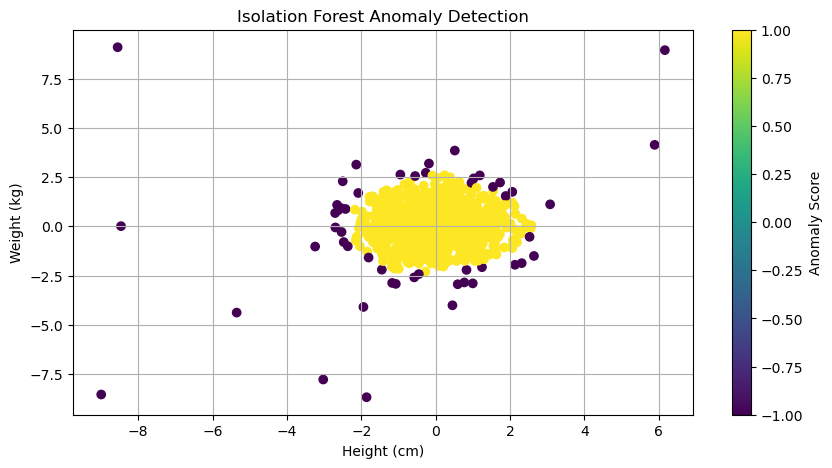

In [31]:
# Isolation Forest for anomaly detection
isolation_forest = IsolationForest(contamination=0.05)
isolation_forest.fit(data)

# Predict anomalies
outlier_preds = isolation_forest.predict(data)

# Plot Isolation Forest results
plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], c=outlier_preds, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()


Isolation Forest:
Accuracy: 0.53
Confusion Matrix:
[[93 11]
 [83 13]]

K-Nearest Neighbors:
Accuracy: 0.92
Confusion Matrix:
[[95  9]
 [ 7 89]]


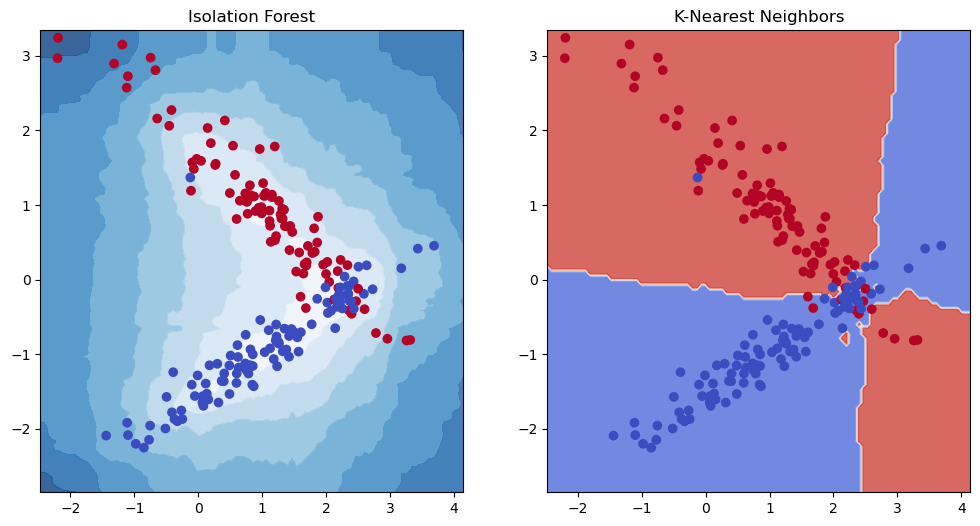

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
isolation_forest.fit(X_train)

# Predict anomalies using Isolation Forest
y_pred_if = isolation_forest.predict(X_test)
y_pred_if[y_pred_if == 1] = 0  # Normal points
y_pred_if[y_pred_if == -1] = 1  # Anomalies

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict using KNN
y_pred_knn = knn.predict(X_test)

# Evaluate Isolation Forest
print("Isolation Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_if))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_if))

# Evaluate KNN
print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Plot decision boundary for Isolation Forest
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = isolation_forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.title("Isolation Forest")

# Plot decision boundary for KNN
plt.subplot(1, 2, 2)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.title("K-Nearest Neighbors")

plt.show()


In [12]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Read the data
file_path = 'Life_Insurance_data.xlsx'
df = pd.read_excel(file_path)

# Preprocess the data: Handle missing values in the income column
df.dropna(subset=['Income'], inplace=True)

# Extract the 'Income' column
income_data = df[['Income']]

# Train the Isolation Forest model
isolation_forest_model = IsolationForest(contamination=0.05)  # Adjust contamination parameter as needed
isolation_forest_model.fit(income_data)

# Train the KNN model
knn_model = LocalOutlierFactor(n_neighbors=5, contamination=0.05)  # Adjust parameters as needed
knn_outlier_scores = knn_model.fit_predict(income_data)

# Combine the outlier scores from both models
combined_outlier_scores = isolation_forest_model.decision_function(income_data) + knn_outlier_scores

# Define a threshold to flag doubtful applicants
threshold = 0  # Adjust threshold as needed

# Flag doubtful applicants based on the combined outlier scores
df['Doubtful_Income'] = 'No'
df.loc[combined_outlier_scores < threshold, 'Doubtful_Income'] = 'Yes'

# Save the results to a new Excel file
output_excel_file_path = 'Doubtful_Income_Applicants_Output.xlsx'
df.to_excel(output_excel_file_path, index=False)

print(f"Doubtful income applicants flagged and saved to {output_excel_file_path}")


Doubtful income applicants flagged and saved to Doubtful_Income_Applicants_Output.xlsx


In [13]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Read the data
file_path = 'Life_Insurance_data.xlsx'
df = pd.read_excel(file_path)

# Preprocess the data: Handle missing values in the location column
df.dropna(subset=['Location'], inplace=True)

# Convert location categorical data to numerical representation (e.g., one-hot encoding)
df = pd.get_dummies(df, columns=['Location'])

# Extract the location columns
location_columns = [col for col in df.columns if 'Location' in col]

# Train the Isolation Forest model
isolation_forest_model = IsolationForest(contamination=0.05)  # Adjust contamination parameter as needed
isolation_forest_model.fit(df[location_columns])

# Train the KNN model
knn_model = LocalOutlierFactor(n_neighbors=5, contamination=0.05)  # Adjust parameters as needed
knn_outlier_scores = knn_model.fit_predict(df[location_columns])

# Combine the outlier scores from both models
combined_outlier_scores = isolation_forest_model.decision_function(df[location_columns]) + knn_outlier_scores

# Define a threshold to flag doubtful applicants
threshold = 0  # Adjust threshold as needed

# Flag doubtful applicants based on the combined outlier scores
df['Doubtful_Location'] = 'No'
df.loc[combined_outlier_scores < threshold, 'Doubtful_Location'] = 'Yes'

# Save the results to a new Excel file
output_excel_file_path = 'Doubtful_Location_Applicants_Output.xlsx'
df.to_excel(output_excel_file_path, index=False)

print(f"Doubtful location applicants flagged and saved to {output_excel_file_path}")


Doubtful location applicants flagged and saved to Doubtful_Location_Applicants_Output.xlsx


In [14]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Read the data
file_path = 'Life_Insurance_data.xlsx'
df = pd.read_excel(file_path)

# Preprocess the data: Handle missing values
df.dropna(subset=['Income', 'Assets', 'Location', 'Profession'], inplace=True)

# Train the Isolation Forest models for income, assets, location, and profession
isolation_forest_income = IsolationForest(contamination=0.05)
isolation_forest_assets = IsolationForest(contamination=0.05)
isolation_forest_location = IsolationForest(contamination=0.05)
isolation_forest_profession = IsolationForest(contamination=0.05)

isolation_forest_income.fit(df[['Income']])
isolation_forest_assets.fit(df[['Assets']])

# Encode the Location and Profession columns (assuming they're categorical)
df['Location_Encoded'] = pd.factorize(df['Location'])[0]
df['Profession_Encoded'] = pd.factorize(df['Profession'])[0]

isolation_forest_location.fit(df[['Location_Encoded']])
isolation_forest_profession.fit(df[['Profession_Encoded']])

# Train the KNN models for income, assets, location, and profession
knn_income = LocalOutlierFactor(n_neighbors=5, contamination=0.05)
knn_assets = LocalOutlierFactor(n_neighbors=5, contamination=0.05)
knn_location = LocalOutlierFactor(n_neighbors=5, contamination=0.05)
knn_profession = LocalOutlierFactor(n_neighbors=5, contamination=0.05)

knn_income_outlier_scores = knn_income.fit_predict(df[['Income']])
knn_assets_outlier_scores = knn_assets.fit_predict(df[['Assets']])
knn_location_outlier_scores = knn_location.fit_predict(df[['Location_Encoded']])
knn_profession_outlier_scores = knn_profession.fit_predict(df[['Profession_Encoded']])

# Combine the outlier scores from Isolation Forest and KNN models for income, assets, location, and profession
combined_income_outlier_scores = isolation_forest_income.decision_function(df[['Income']]) + knn_income_outlier_scores
combined_assets_outlier_scores = isolation_forest_assets.decision_function(df[['Assets']]) + knn_assets_outlier_scores
combined_location_outlier_scores = isolation_forest_location.decision_function(df[['Location_Encoded']]) + knn_location_outlier_scores
combined_profession_outlier_scores = isolation_forest_profession.decision_function(df[['Profession_Encoded']]) + knn_profession_outlier_scores

# Define thresholds to flag doubtful applicants
income_threshold = 0  # Adjust threshold as needed for income
assets_threshold = 0  # Adjust threshold as needed for assets
location_threshold = 0  # Adjust threshold as needed for location
profession_threshold = 0  # Adjust threshold as needed for profession

# Flag doubtful applicants based on the combined outlier scores
df['Doubtful_Income'] = 'No'
df.loc[combined_income_outlier_scores < income_threshold, 'Doubtful_Income'] = 'Yes'

df['Doubtful_Assets'] = 'No'
df.loc[combined_assets_outlier_scores < assets_threshold, 'Doubtful_Assets'] = 'Yes'

df['Doubtful_Location'] = 'No'
df.loc[combined_location_outlier_scores < location_threshold, 'Doubtful_Location'] = 'Yes'

df['Doubtful_Profession'] = 'No'
df.loc[combined_profession_outlier_scores < profession_threshold, 'Doubtful_Profession'] = 'Yes'

# Save the results to a new Excel file
output_excel_file_path = 'Doubtful_Applicants_Income_Assets_Location_Profession_Output.xlsx'
df.to_excel(output_excel_file_path, index=False)

print(f"Doubtful income, assets, location, and profession applicants flagged and saved to {output_excel_file_path}")


Doubtful income, assets, location, and profession applicants flagged and saved to Doubtful_Applicants_Income_Assets_Location_Profession_Output.xlsx
